In [14]:
!pip install statsmodels==0.12.2
!pip install pandas==0.25.3
!pip install numpy==1.17.2


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [16]:
data = pd.read_csv('training.csv', sep=',',infer_datetime_format=True)
data.head()

,time,time.1,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
0,2021-11-01 00:00:00,2021-11-01 00:00:00,2.100013,207.79967,21544.232,15.20187,278.53552,88.662880
1,2021-11-01 00:20:00,2021-11-01 00:20:00,1.494543,195.41899,22789.700,16.10757,278.40363,85.743430
2,2021-11-01 00:40:00,2021-11-01 00:40:00,1.203924,205.38362,26924.135,20.17623,278.90930,66.800240
3,2021-11-01 01:00:00,2021-11-01 01:00:00,0.787564,204.74925,28133.807,24.39370,279.38147,53.934402
4,2021-11-01 01:20:00,2021-11-01 01:20:00,1.840468,187.68733,29133.484,27.30508,278.62110,36.173420


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8639 entries, 0 to 8638
Data columns (total 8 columns):
time           8639 non-null object
time.1         8639 non-null object
Wind_speed     8639 non-null float64
Wind_dir       8639 non-null float64
Visibility     8639 non-null float64
Temperature    8639 non-null float64
dewpoint       8639 non-null float64
Humidity       8639 non-null float64
dtypes: float64(6), object(2)
memory usage: 540.1+ KB


In [18]:
data.isnull().sum()

time           0
time.1         0
Wind_speed     0
Wind_dir       0
Visibility     0
Temperature    0
dewpoint       0
Humidity       0
dtype: int64

In [19]:
null_data = data[data.isnull().any(axis=1)]
null_data.head()

,time,time.1,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity


In [20]:
data = data.dropna()
data.shape

(8639, 8)

In [21]:
data.describe()

,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
count,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000,8639.000000
mean,2.449192,219.289236,23663.605664,15.563726,279.267334,70.331718
std,1.077667,88.239025,5660.564430,5.543365,2.640787,23.591963
min,0.040244,0.208430,47.064730,3.107320,272.045620,13.082347
25%,1.821636,140.548165,20919.442500,11.517700,277.556950,53.221351
50%,2.287039,249.311500,25163.307000,14.765830,279.563720,77.724230
75%,2.831864,285.479010,28172.606000,19.232740,281.179410,89.708857
max,8.696900,359.992650,29984.441000,30.898770,286.080570,100.030350


In [22]:
data.isnull().sum()

time           0
time.1         0
Wind_speed     0
Wind_dir       0
Visibility     0
Temperature    0
dewpoint       0
Humidity       0
dtype: int64

In [23]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8629, 8630, 8631, 8632, 8633, 8634, 8635, 8636, 8637, 8638],
           dtype='int64', length=8639)

In [24]:
from datetime import datetime
DateTime = []
for x in data['time']:
    DateTime.append(datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

In [25]:
datetime = pd.Series(DateTime)
data.index = datetime

In [26]:
data.head()

,time,time.1,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
2021-11-01 00:00:00,2021-11-01 00:00:00,2021-11-01 00:00:00,2.100013,207.79967,21544.232,15.20187,278.53552,88.662880
2021-11-01 00:20:00,2021-11-01 00:20:00,2021-11-01 00:20:00,1.494543,195.41899,22789.700,16.10757,278.40363,85.743430
2021-11-01 00:40:00,2021-11-01 00:40:00,2021-11-01 00:40:00,1.203924,205.38362,26924.135,20.17623,278.90930,66.800240
2021-11-01 01:00:00,2021-11-01 01:00:00,2021-11-01 01:00:00,0.787564,204.74925,28133.807,24.39370,279.38147,53.934402
2021-11-01 01:20:00,2021-11-01 01:20:00,2021-11-01 01:20:00,1.840468,187.68733,29133.484,27.30508,278.62110,36.173420


In [27]:
data.drop(['time.1'],axis=1)

,time,Wind_speed,Wind_dir,Visibility,Temperature,dewpoint,Humidity
2021-11-01 00:00:00,2021-11-01 00:00:00,2.100013,207.799670,21544.232,15.20187,278.53552,88.662880
2021-11-01 00:20:00,2021-11-01 00:20:00,1.494543,195.418990,22789.700,16.10757,278.40363,85.743430
2021-11-01 00:40:00,2021-11-01 00:40:00,1.203924,205.383620,26924.135,20.17623,278.90930,66.800240
2021-11-01 01:00:00,2021-11-01 01:00:00,0.787564,204.749250,28133.807,24.39370,279.38147,53.934402
2021-11-01 01:20:00,2021-11-01 01:20:00,1.840468,187.687330,29133.484,27.30508,278.62110,36.173420
...,...,...,...,...,...,...,...
2022-02-28 22:00:00,2022-02-28 22:00:00,2.878578,43.280148,24983.137,15.15707,281.29224,78.582830
2022-02-28 22:20:00,2022-02-28 22:20:00,2.929234,57.654358,24396.059,14.70560,280.32050,80.957250
2022-02-28 22:40:00,2022-02-28 22:40:00,2.810684,73.107850,23917.078,14.16802,279.57960,82.649110
2022-02-28 23:00:00,2022-02-28 23:00:00,0.808328,149.121290,18756.250,13.55844,278.29030,92.568290


In [28]:
data.dtypes

time            object
time.1          object
Wind_speed     float64
Wind_dir       float64
Visibility     float64
Temperature    float64
dewpoint       float64
Humidity       float64
dtype: object

In [29]:
S1 = data['Wind_speed'].fillna(data['Wind_speed'].mean())
S2 = data['Wind_dir'].fillna(data['Wind_dir'].mean())
S3 = data['Visibility'].fillna(data['Visibility'].mean())
S4 = data['Temperature'].fillna(data['Temperature'].mean())
S5 = data['dewpoint'].fillna(data['dewpoint'].mean())
S6 = data['Humidity'].fillna(data['Humidity'].mean())

In [30]:
df = pd.DataFrame({'S1':S1, 'S2':S1, 'S3':S3, 'S4':S4, 'S5':S5,'S6':S6})
df.to_csv("Visibility_processed.csv")

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'S6')

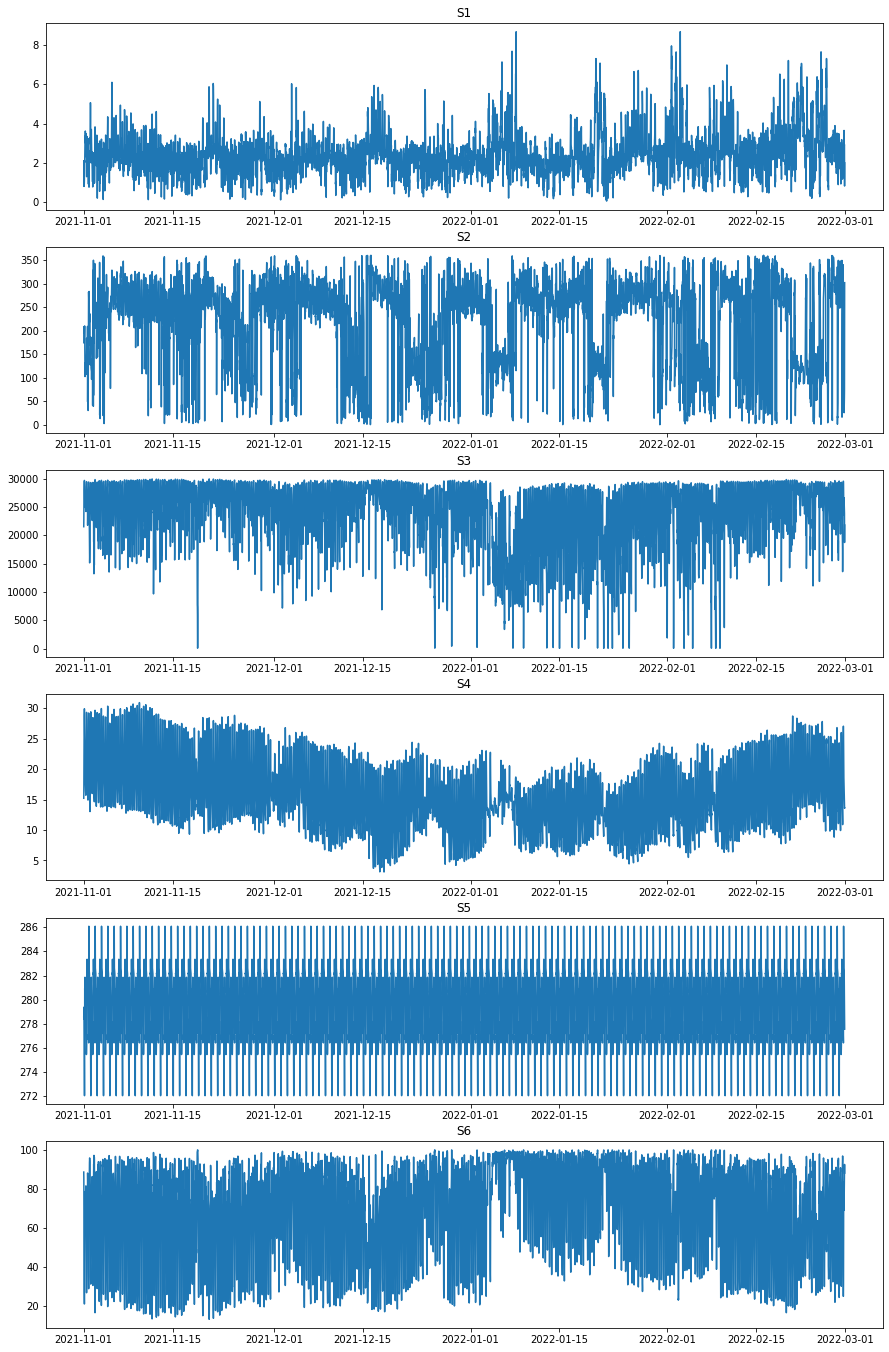

In [31]:
fig, axes = plt.subplots(6,1, figsize=(15,24))

axes[0].plot(S1)
axes[0].set_title ('S1')
axes[1].plot(S2)
axes[1].set_title ('S2')
axes[2].plot(S3)
axes[2].set_title ('S3')
axes[3].plot(S4)
axes[3].set_title ('S4')
axes[4].plot(S5)
axes[4].set_title ('S5')
axes[5].plot(S6)
axes[5].set_title ('S6')

In [63]:
fig.savefig("output.png")

Text(0.5, 1.0, 'S6')

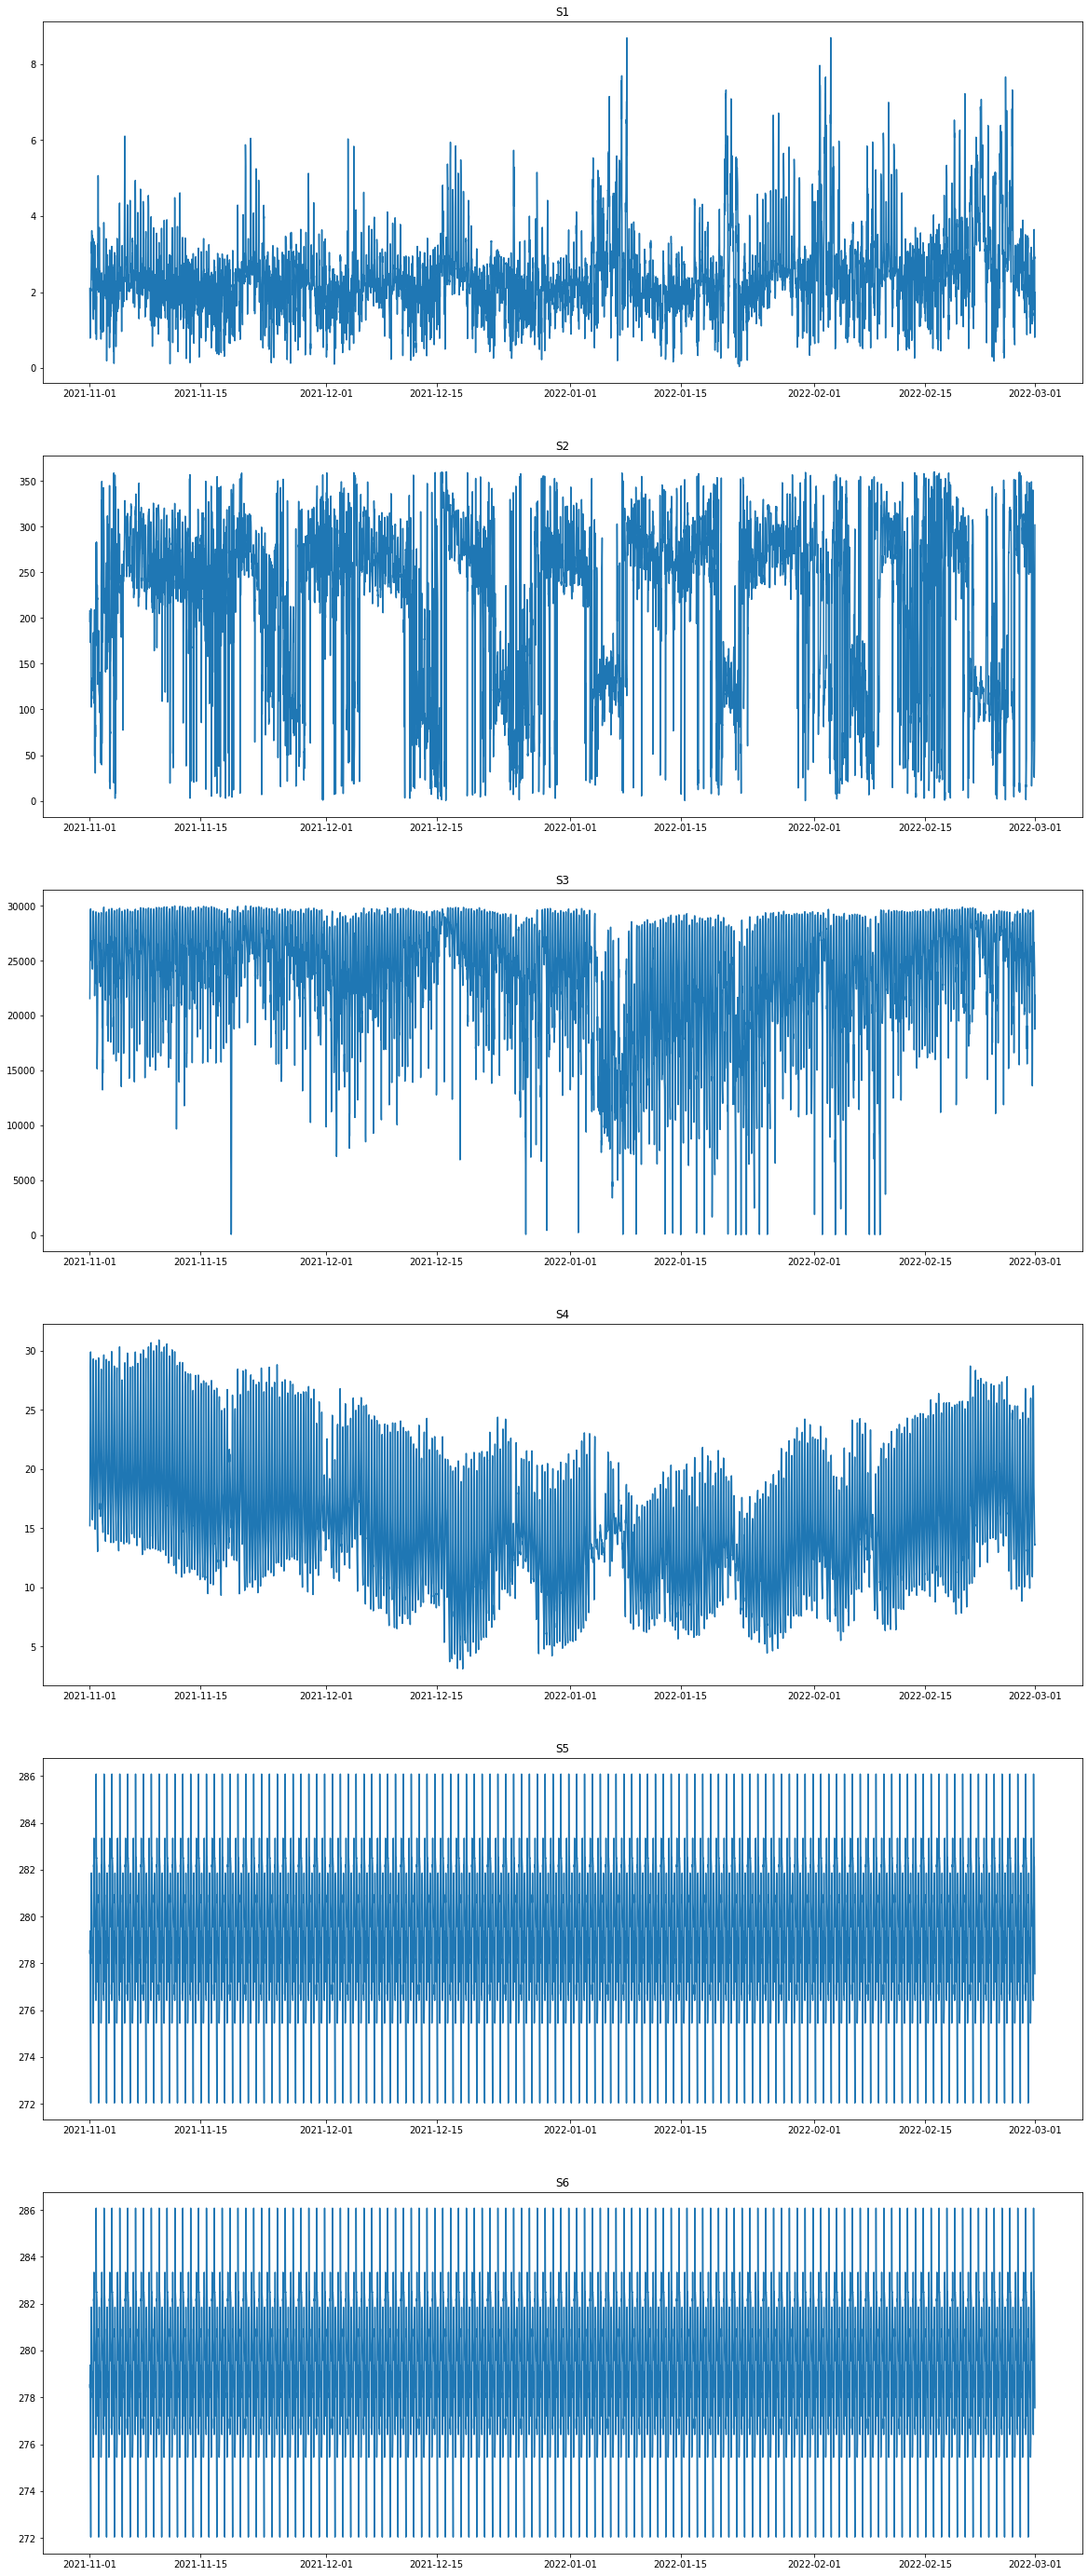

In [32]:
fig, axes = plt.subplots(6,1, figsize=(20,50))

axes[0].plot(S1['2021-11-01':'2022-02-28'])
axes[0].set_title ('S1')
axes[1].plot(S2['2021-11-01':'2022-02-28'])
axes[1].set_title ('S2')
axes[2].plot(S3['2021-11-01':'2022-02-28'])
axes[2].set_title ('S3')
axes[3].plot(S4['2021-11-01':'2022-02-28'])
axes[3].set_title ('S4')
axes[4].plot(S5['2021-11-01':'2022-02-28'])
axes[4].set_title ('S5')
axes[5].plot(S5['2021-11-01':'2022-02-28'])
axes[5].set_title ('S6')

In [33]:
df_RH = pd.DataFrame({'S3':S3})
df.to_csv("AirQuality_processed_RH.csv")
df_RH.head()

,S3
2021-11-01 00:00:00,21544.232
2021-11-01 00:20:00,22789.700
2021-11-01 00:40:00,26924.135
2021-11-01 01:00:00,28133.807
2021-11-01 01:20:00,29133.484


In [34]:
#Determine the rolling statistics
rolmean = df_RH.rolling(window=12).mean()
rolstd = df_RH.rolling(window=12).std()
print(rolmean,rolstd)

                               S3
2021-11-01 00:00:00           NaN
2021-11-01 00:20:00           NaN
2021-11-01 00:40:00           NaN
2021-11-01 01:00:00           NaN
2021-11-01 01:20:00           NaN
...                           ...
2022-02-28 22:00:00  26563.362417
2022-02-28 22:20:00  26131.261250
2022-02-28 22:40:00  25660.898917
2022-02-28 23:00:00  24778.020583
2022-02-28 23:20:00  24300.874583

[8639 rows x 1 columns]                               S3
2021-11-01 00:00:00          NaN
2021-11-01 00:20:00          NaN
2021-11-01 00:40:00          NaN
2021-11-01 01:00:00          NaN
2021-11-01 01:20:00          NaN
...                          ...
2022-02-28 22:00:00  2049.704236
2022-02-28 22:20:00  1896.481066
2022-02-28 22:40:00  1652.676434
2022-02-28 23:00:00  2230.978668
2022-02-28 23:20:00  2191.748755

[8639 rows x 1 columns]


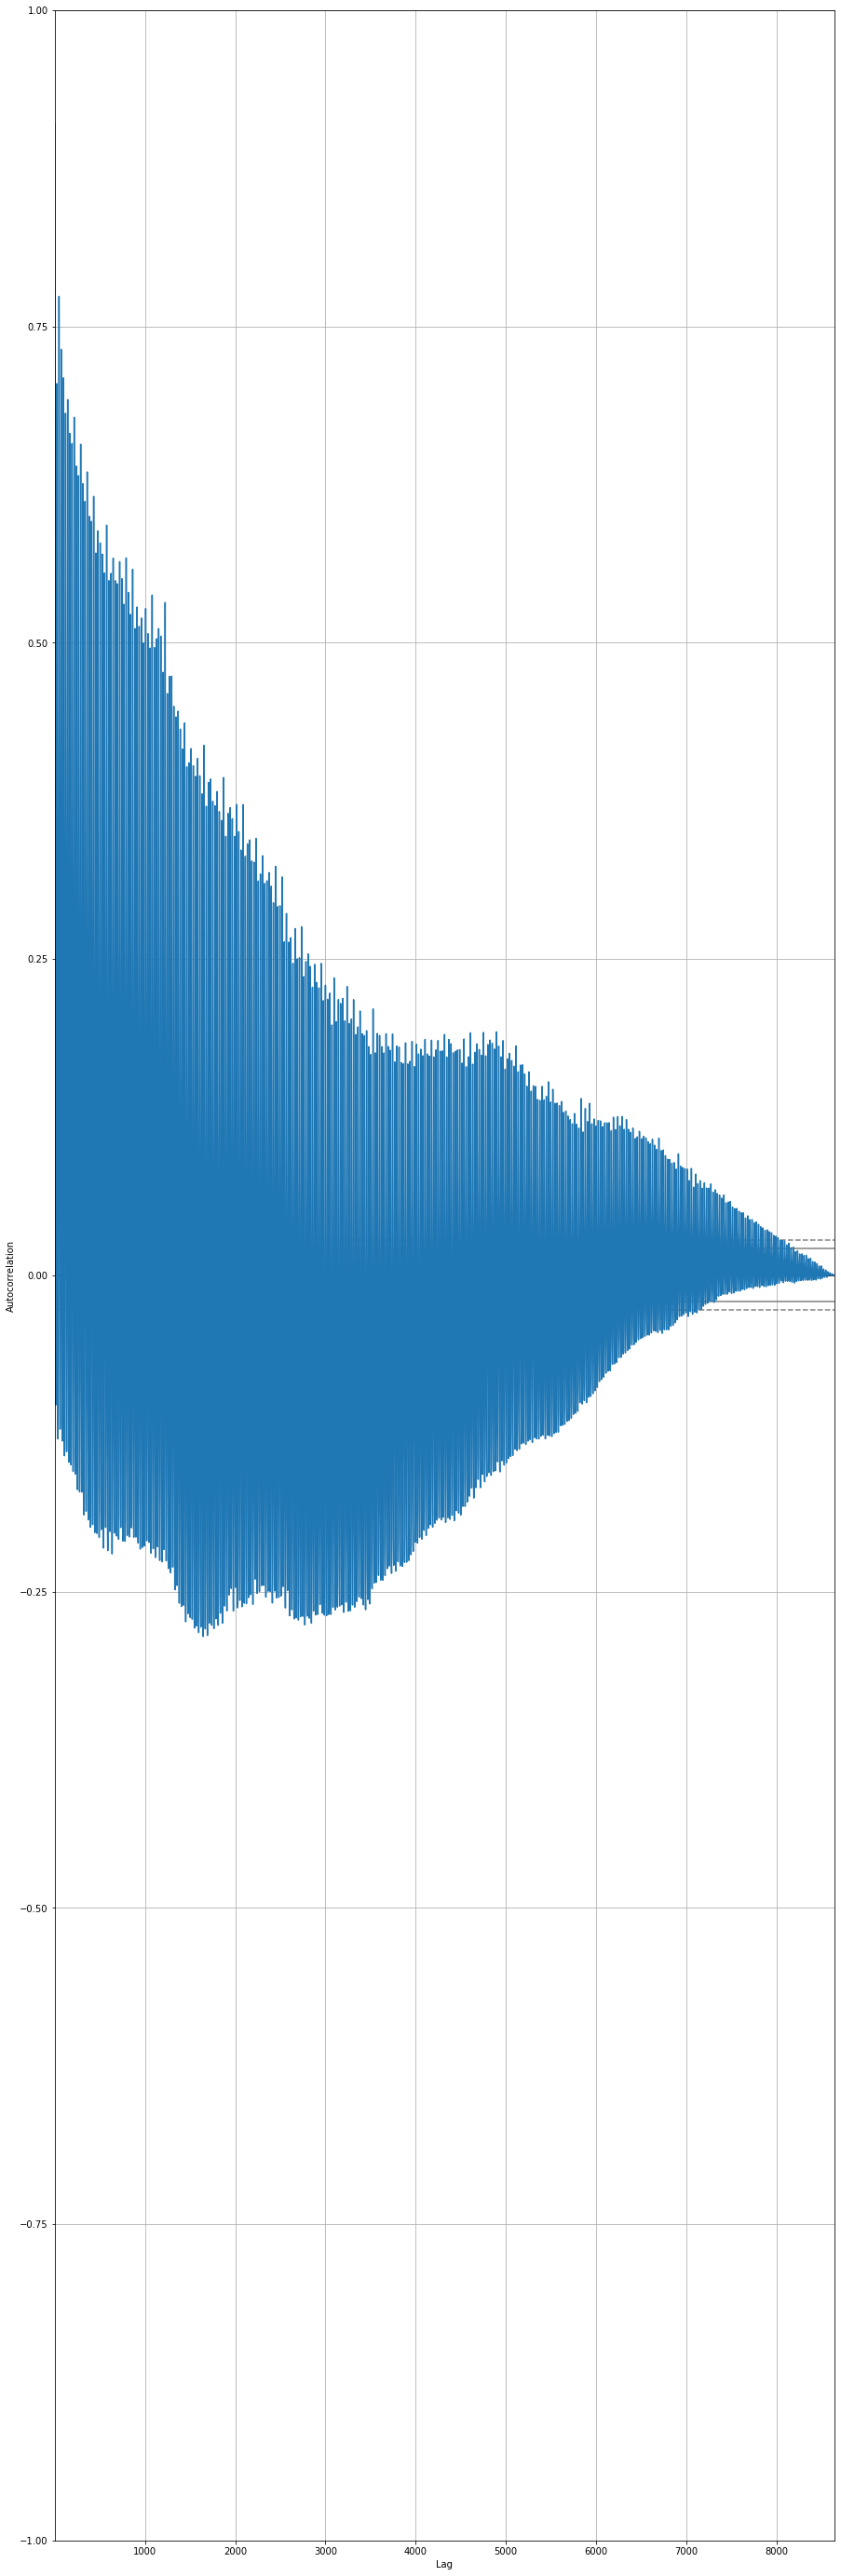

In [35]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
rcParams['figure.figsize'] = 15,50
autocorrelation_plot(df_RH)
pyplot.show()

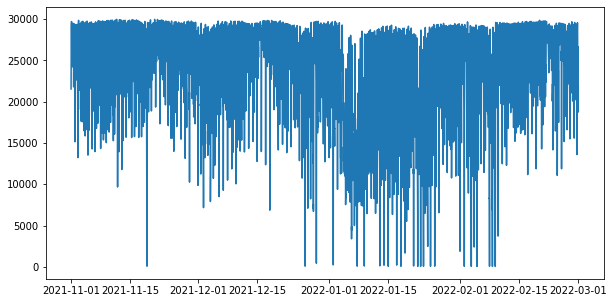

In [36]:
rcParams['figure.figsize'] = 10,5

pyplot.plot(df_RH)
pyplot.show()

In [37]:
# perform dickey-fuller test
from statsmodels.tsa.stattools import adfuller
print ('Result for Dickey fuller test')
# print(indexedDataset['#Passengers'])
dftest= adfuller(df_RH['S3'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observation Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
    
print(dfoutput)

Result for Dickey fuller test
Test Statistic               -8.055325e+00
p-value                       1.698642e-12
#Lags Used                    2.700000e+01
Number of observation Used    8.611000e+03
Critical Value (1%)          -3.431110e+00
Critical Value (5%)          -2.861876e+00
Critical Value (10%)         -2.566949e+00
dtype: float64


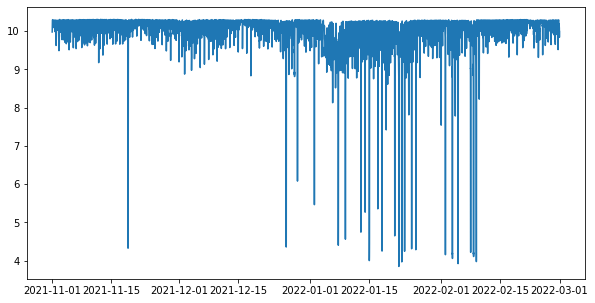

In [38]:
#Estimate trend
df_RH_logScale = np.log(df_RH)
plt.plot(df_RH_logScale)

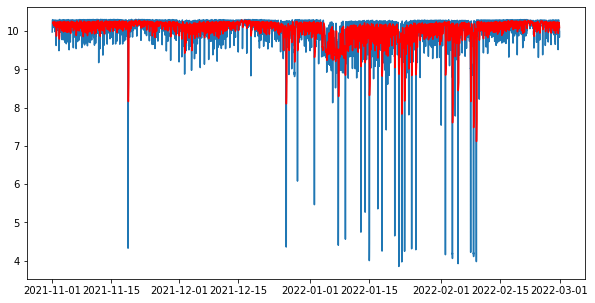

In [39]:
#MA
movingAverage = df_RH_logScale.rolling(window=12).mean()
movingStd = df_RH_logScale.rolling(window=12).std()
plt.plot(df_RH_logScale)
plt.plot(movingAverage,color='red')

In [40]:
datasetLogScaleMinusMovingAverage = df_RH_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,S3
2021-11-01 03:40:00,-0.055665
2021-11-01 04:00:00,-0.104847
2021-11-01 04:20:00,-0.111981
2021-11-01 04:40:00,-0.069108
2021-11-01 05:00:00,-0.046196
2021-11-01 05:20:00,-0.047493
2021-11-01 05:40:00,-0.028921
2021-11-01 06:00:00,-0.011960
2021-11-01 06:20:00,-0.025447
2021-11-01 06:40:00,-0.036881


In [41]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    # Plot rolling
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red',label='Rolling Average')
    std = plt.plot(movingStd, color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # perform Dickey Fuller Test
    print('Result of Dickey Fuller Test')
    dftest = adfuller(timeseries['S3'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value    
    print(dfoutput)

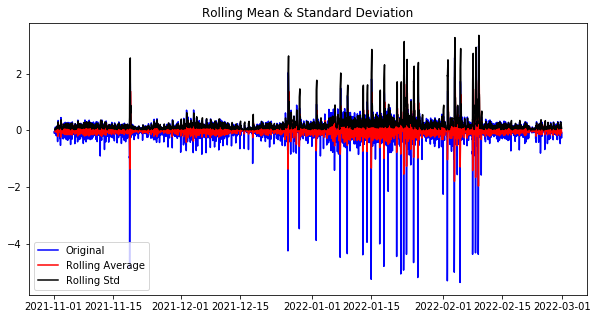

Result of Dickey Fuller Test
Test Statistic                 -27.323347
p-value                          0.000000
#Lags Used                      37.000000
Number of observation Used    8590.000000
Critical Value (1%)             -3.431111
Critical Value (5%)             -2.861877
Critical Value (10%)            -2.566949
dtype: float64


In [42]:
test_stationary(datasetLogScaleMinusMovingAverage)

In [71]:
exponentialDecayWeightedAverage = df_RH_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_RH_logScale)
plt1 = plt.plot(df_RH_logScale)
plt1.savefig("df_RH_logScale.png")
plt.plot(exponentialDecayWeightedAverage,color='red')
plt2 = plt.plot(exponentialDecayWeightedAverage,color='red')
plt2.savefig("exponentialDecayWeightedAverage.png")

AttributeError: 'Figure' object has no attribute 'plot'

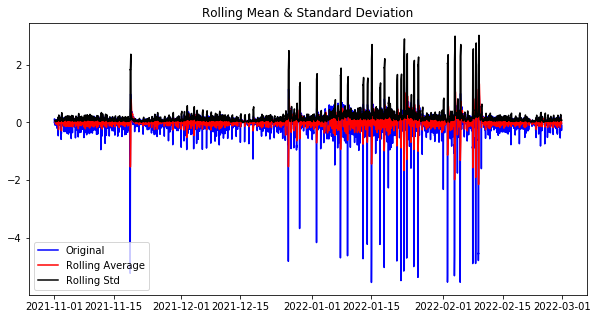

Result of Dickey Fuller Test
Test Statistic                 -25.216733
p-value                          0.000000
#Lags Used                      37.000000
Number of observation Used    8601.000000
Critical Value (1%)             -3.431111
Critical Value (5%)             -2.861876
Critical Value (10%)            -2.566949
dtype: float64


In [44]:
datasetLogScaleMinusMovingExponentialDecayAverage = df_RH_logScale - exponentialDecayWeightedAverage
test_stationary(datasetLogScaleMinusMovingExponentialDecayAverage)

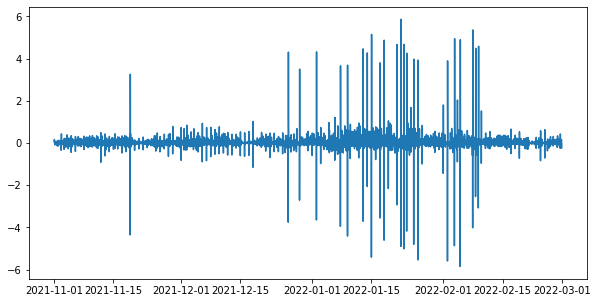

In [45]:

datasetLogDiffShifting  = df_RH_logScale-df_RH_logScale.shift()
plt.plot(datasetLogDiffShifting)

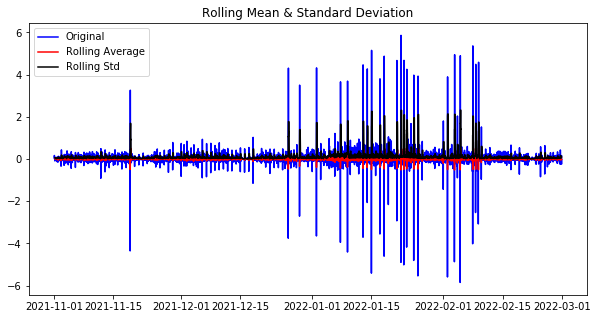

Result of Dickey Fuller Test
Test Statistic                 -32.741059
p-value                          0.000000
#Lags Used                      25.000000
Number of observation Used    8612.000000
Critical Value (1%)             -3.431110
Critical Value (5%)             -2.861876
Critical Value (10%)            -2.566949
dtype: float64


In [46]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationary(datasetLogDiffShifting)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 20T will be u

Plotting AR Model


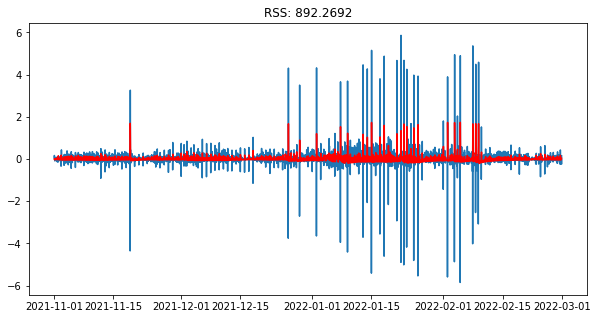

In [47]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model

model = ARIMA(df_RH_logScale,order=(2, 1, 2))

# print(model)
result_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_AR.fittedvalues-datasetLogDiffShifting["S3"])**2))
print('Plotting AR Model')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 20T will be u

Plotting AR Model


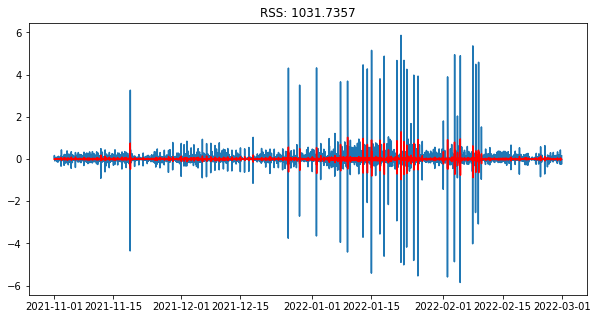

In [48]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model

model = ARIMA(df_RH_logScale,order=(2, 1, 0))

# print(model)
result_MA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_MA.fittedvalues-datasetLogDiffShifting["S3"])**2))
print('Plotting AR Model')

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency 20T will be u

Plotting AR Model


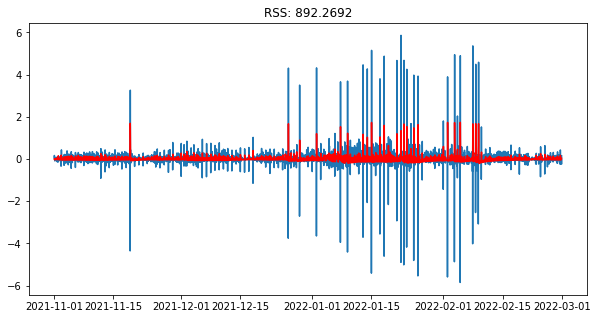

In [49]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model

model = ARIMA(df_RH_logScale,order=(2, 1, 2))

# print(model)
result_ARIMA= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(result_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((result_ARIMA.fittedvalues-datasetLogDiffShifting["S3"])**2))
print('Plotting AR Model')

In [50]:
prediction_ARIMA_diff = pd.Series(result_ARIMA.fittedvalues,copy=True)
print(prediction_ARIMA_diff.head())

2021-11-01 00:20:00   -2.729650e-07
2021-11-01 00:40:00    3.959042e-03
2021-11-01 01:00:00    4.431972e-03
2021-11-01 01:20:00   -3.080601e-02
2021-11-01 01:40:00   -3.522241e-02
dtype: float64


In [51]:
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

2021-11-01 00:20:00   -2.729650e-07
2021-11-01 00:40:00    3.958769e-03
2021-11-01 01:00:00    8.390741e-03
2021-11-01 01:20:00   -2.241527e-02
2021-11-01 01:40:00   -5.763767e-02
dtype: float64


In [52]:
prediction_ARIMA_log = pd.Series(df_RH_logScale['S3'].ix[0], index=df_RH_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum,fill_value =0)
prediction_ARIMA_log.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


2021-11-01 00:00:00    9.977863
2021-11-01 00:20:00    9.977863
2021-11-01 00:40:00    9.981822
2021-11-01 01:00:00    9.986254
2021-11-01 01:20:00    9.955448
dtype: float64

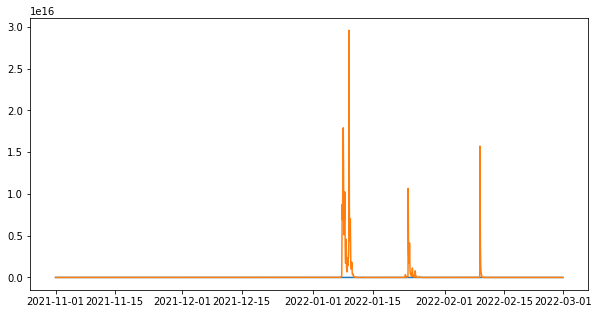

In [53]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(df_RH)
plt.plot(prediction_ARIMA)

In [54]:
df_RH_logScale

,S3
2021-11-01 00:00:00,9.977863
2021-11-01 00:20:00,10.034064
2021-11-01 00:40:00,10.200778
2021-11-01 01:00:00,10.244727
2021-11-01 01:20:00,10.279643
...,...
2022-02-28 22:00:00,10.125956
2022-02-28 22:20:00,10.102177
2022-02-28 22:40:00,10.082348
2022-02-28 23:00:00,9.839282


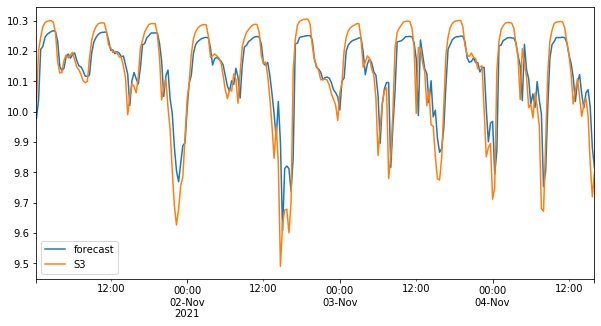

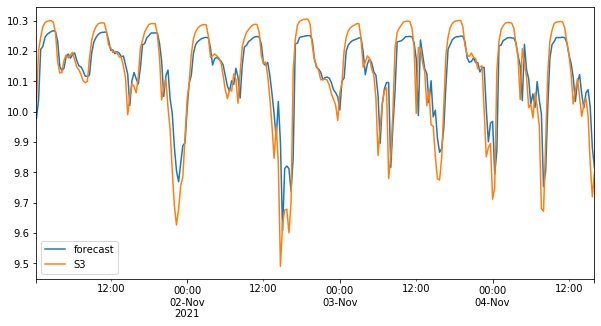

In [66]:
result_ARIMA.plot_predict(1,264)
plt = result_ARIMA.plot_predict(1,264)
plt.savefig("arima_output.png")

In [56]:
print(result_ARIMA.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.73e-07   7.28e-05     -0.004      0.997      -0.000       0.000
ar.L1.D.S3     0.9142      0.045     20.426      0.000       0.827       1.002
ar.L2.D.S3    -0.2197      0.035     -6.360      0.000      -0.287      -0.152
ma.L1.D.S3    -0.9896      0.046    -21.641      0.000      -1.079      -0.900
ma.L2.D.S3    -0.0041      0.046     -0.090      0.928      -0.093       0.085


In [57]:
# fig = px.line(df, t='time', ws='Wind_speed', wd='Wind_dir', v='Visibility', tem='Temperature', d='dewpoint', h='Humidity' title='Visibility_Prediction')

In [58]:
from sklearn.metrics import mean_squared_error
import math

In [59]:
mse = mean_squared_error(df_RH, prediction_ARIMA)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 1151296231017454.000000
